In [1]:
import numpy as np
import pandas as pd
import os
import time

In [2]:
cd models

F:\FINAL\Prediction\pc_ui2\FINAL\Detection\models


In [3]:
## Read model data from models folder
folders = [_ for _ in os.listdir('./') if 'final' in _]
folders

['CNN_parival_5-6_ENZ_final_all_ep50_batch4_#1',
 'EFFICIENTNETB5_parival_5-6_ENZ_final_all_ep50_batch32_#1',
 'MOBILENETV3_parival_5-6_ENZ_final_all_ep50_batch32_#1']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math

# Plotting function
def parrival_plot(df_result,PA_start,x_pos,save_fig):
    fig, ax = plt.subplots(figsize=(15,5))
    data_PA = df_result[['filename','second_start']].set_index('filename') ## Get data PA from DF
    data_PA = data_PA['second_start'].apply(lambda x: np.ceil(x*10)/10).fillna(round((PA_start+200)*0.05,2)) # default PA 10s
    excluded = {} # filter PA to plot, out of range of PA noted into outliers
    for ___ in data_PA[data_PA<=x_pos[0]].index:
        excluded[___] = data_PA[data_PA<=x_pos[0]][___]
    for ___ in data_PA[data_PA>=x_pos[1]].index:
        excluded[___] = data_PA[data_PA>=x_pos[1]][___]
    score = round(float(np.mean(df_result.second_start.apply(lambda x: abs(x)))),4)
    ax.text(x_pos[0]+0.005,max(Counter(data_PA).values()), verticalalignment='top',
            s='MAE:\n'+str(score)+'s\n\n'+'Outlier:'+'\n'+'\n'.join([st+': '+str(excluded[st])+'s' for st in excluded]),color='r')
    data_PA = data_PA[data_PA>x_pos[0]][data_PA<x_pos[1]]
    print(data_PA.shape)
    ax.bar(Counter(data_PA).keys(),Counter(data_PA).values(), 
           0.05*2, color='gray', label='predict', align='center',edgecolor='k')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Freq')
    ax.set_xlabel('Seconds')
    min_x = x_pos[0]
    max_x = x_pos[1]
    coef_x = 0.05
    min_x = round(min(min(data_PA),min_x),1)
    min_x = min_x + 0.1 if min_x*10%2!=0 else min_x
    max_x = round(max(max(data_PA),max_x),1)
    max_x = max_x - 0.1 if max_x*10%2!=0 else max_x
    ax.set_xticks(np.linspace(min_x,max_x,int((max_x-min_x)*coef_x*100)+1))
    ax.grid(color='k', linestyle='dotted', linewidth=0.5, axis='y')
    ax.set_title(save_fig.split('/')[0]+'_'+'_'.join(save_fig.split('/')[-1].split('_')[-3:]))
    plt.savefig(save_fig+'.png')

CNN_parival_5-6_ENZ_final_all_ep50_batch4_#1
['Hasil_test_PA_5-6_Check1_best', 'Hasil_test_PA_5-6_Check1_swa', 'Hasil_test_PA_5-6_Check2_best', 'Hasil_test_PA_5-6_Check2_swa', 'Hasil_test_PA_5-6_Check3_best', 'Hasil_test_PA_5-6_Check3_swa', 'Hasil_test_PA_5-6_Check4_best', 'Hasil_test_PA_5-6_Check4_swa', 'Hasil_test_PA_5-6_Check5_best', 'Hasil_test_PA_5-6_Check5_swa']
(57,)
(58,)
(61,)
(60,)
(62,)
(60,)
(62,)
(61,)
(62,)
(61,)
EFFICIENTNETB5_parival_5-6_ENZ_final_all_ep50_batch32_#1
['Hasil_test_PA_5-6_Check10_best', 'Hasil_test_PA_5-6_Check10_SWA', 'Hasil_test_PA_5-6_Check1_best', 'Hasil_test_PA_5-6_Check1_SWA', 'Hasil_test_PA_5-6_Check2_best', 'Hasil_test_PA_5-6_Check2_SWA', 'Hasil_test_PA_5-6_Check3_best', 'Hasil_test_PA_5-6_Check3_SWA', 'Hasil_test_PA_5-6_Check4_best', 'Hasil_test_PA_5-6_Check4_SWA', 'Hasil_test_PA_5-6_Check5_best', 'Hasil_test_PA_5-6_Check5_SWA']
(61,)
(62,)
(56,)
(57,)
(60,)
(61,)
(61,)
(62,)
(62,)
(62,)
(62,)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


(62,)
MOBILENETV3_parival_5-6_ENZ_final_all_ep50_batch32_#1
['Hasil_test_PA_5-6_Check1_best', 'Hasil_test_PA_5-6_Check1_SWA', 'Hasil_test_PA_5-6_Check2_best', 'Hasil_test_PA_5-6_Check2_SWA', 'Hasil_test_PA_5-6_Check3_best', 'Hasil_test_PA_5-6_Check3_SWA', 'Hasil_test_PA_5-6_Check4_best', 'Hasil_test_PA_5-6_Check4_SWA', 'Hasil_test_PA_5-6_Check5_best', 'Hasil_test_PA_5-6_Check5_SWA']
(56,)
(59,)
(60,)
(61,)
(60,)
(61,)
(60,)
(61,)
(60,)
(61,)


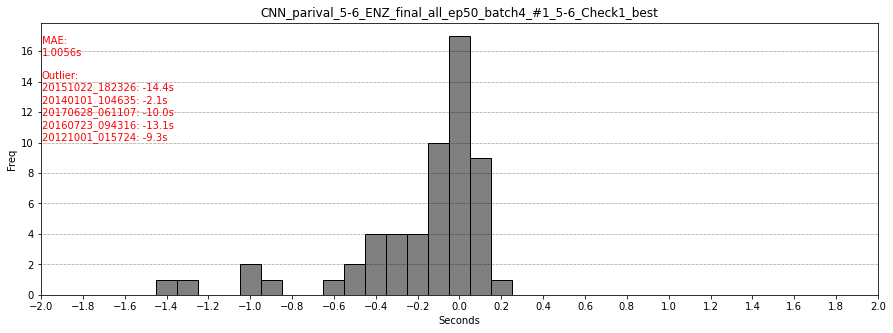

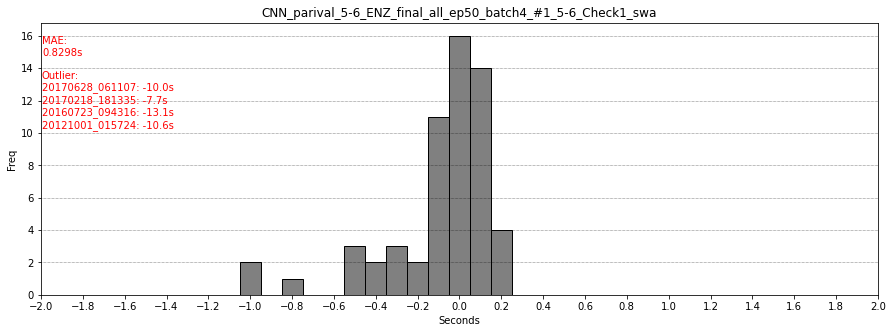

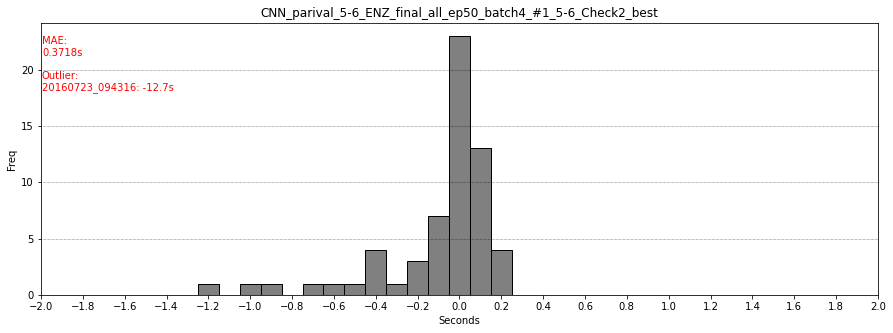

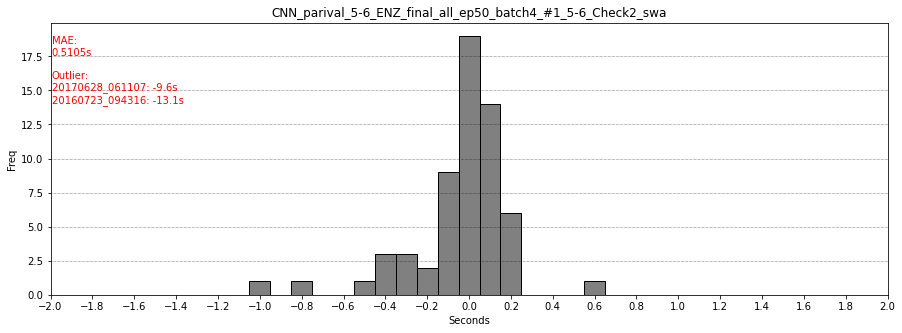

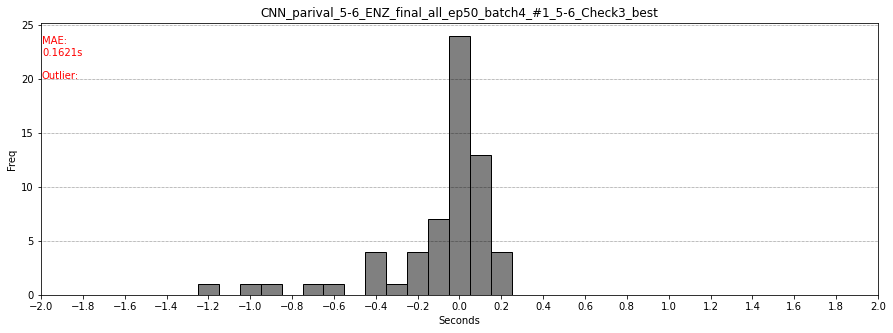

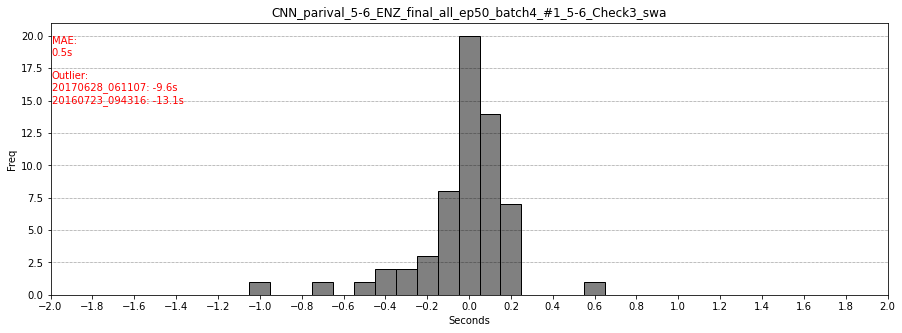

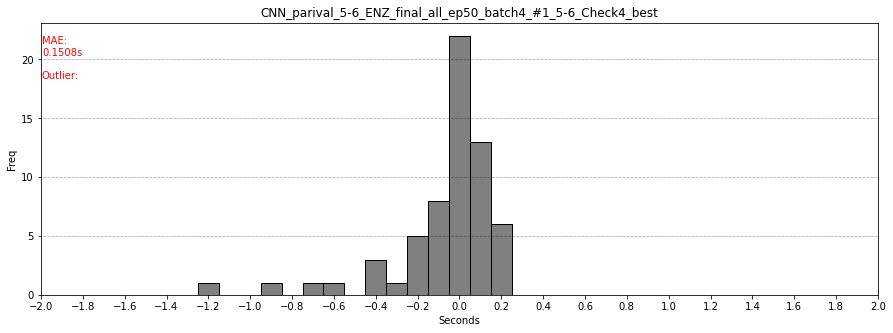

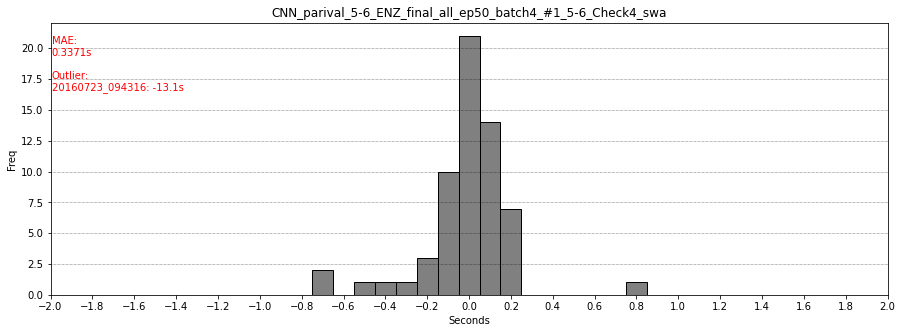

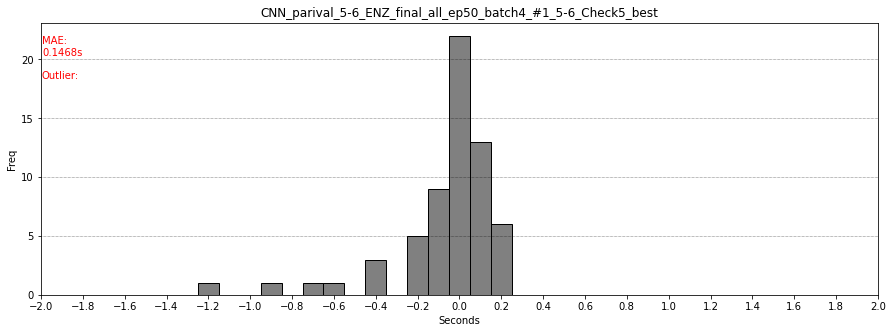

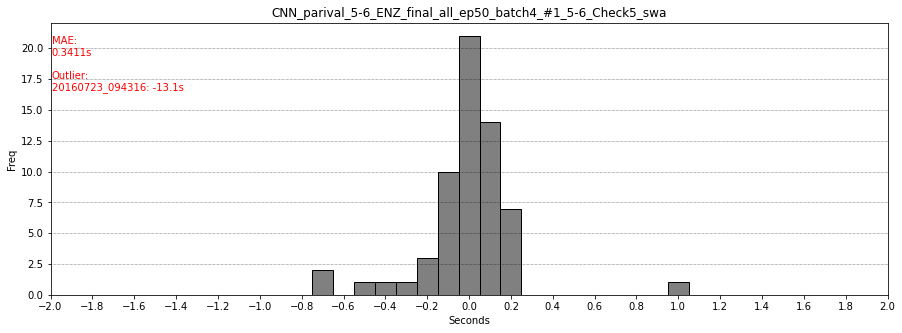

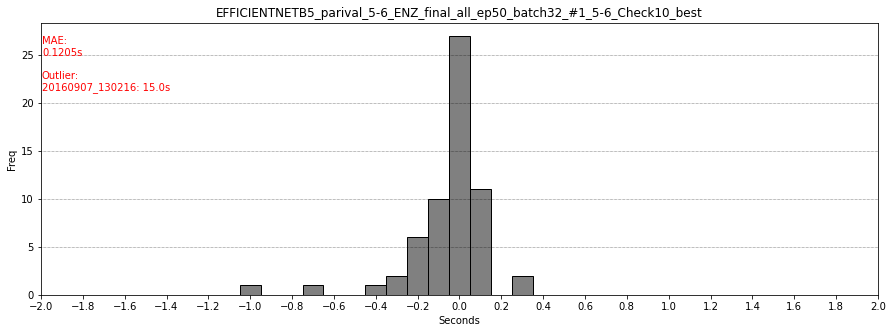

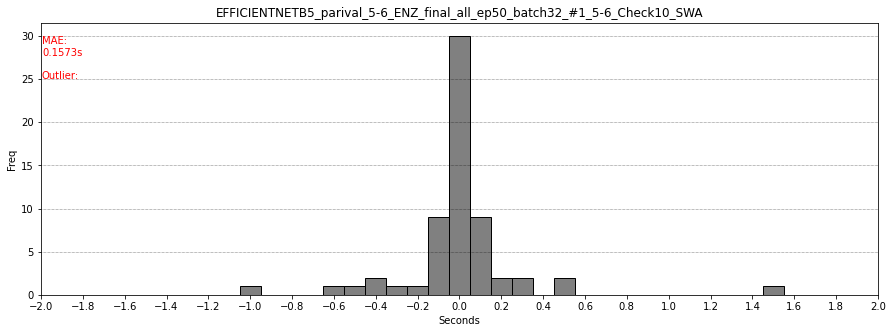

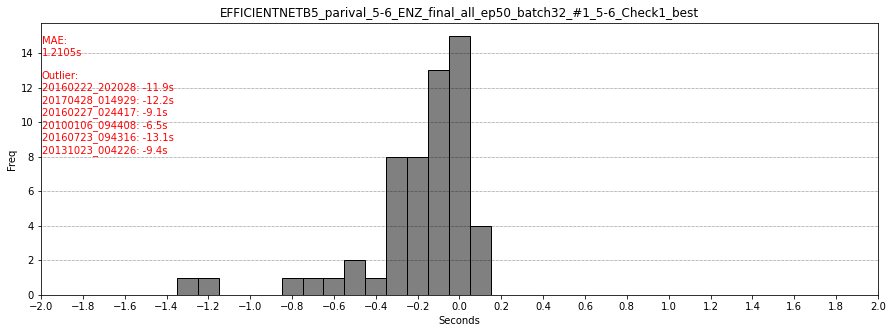

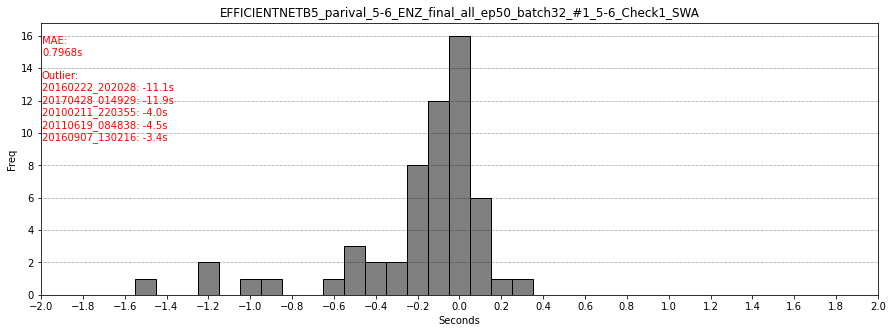

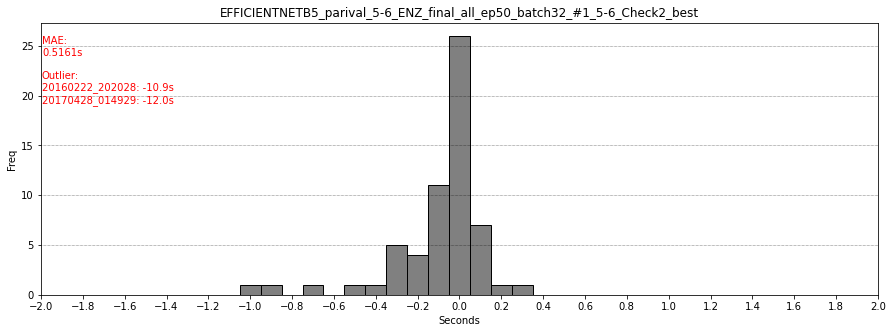

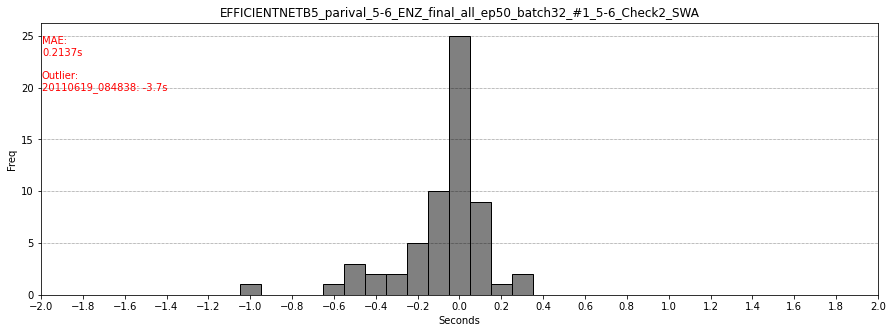

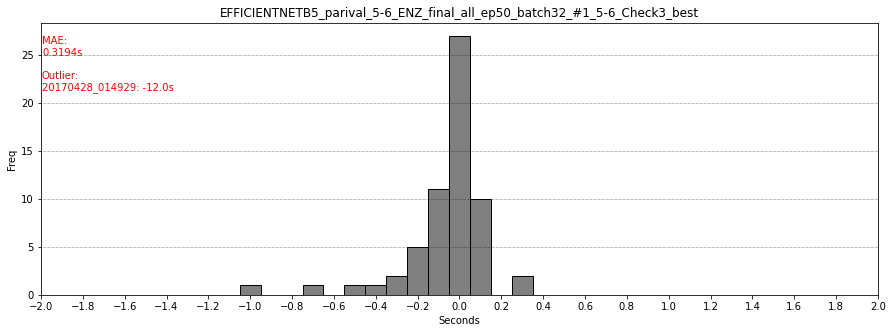

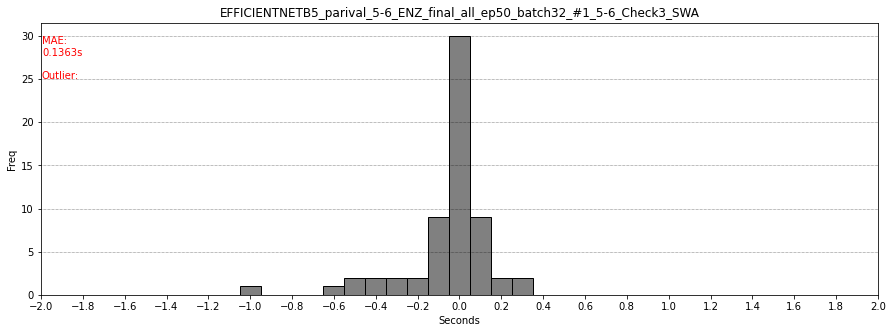

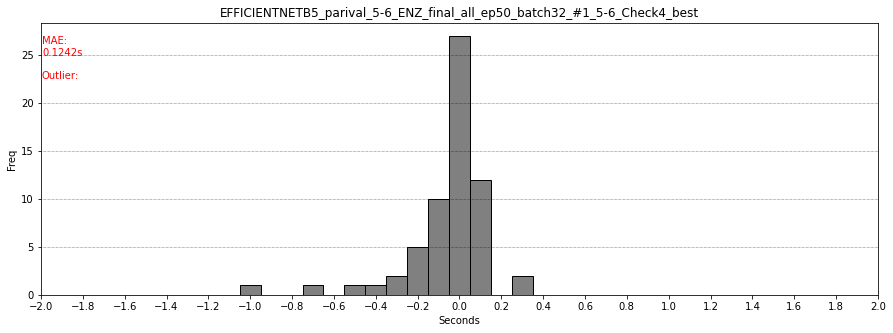

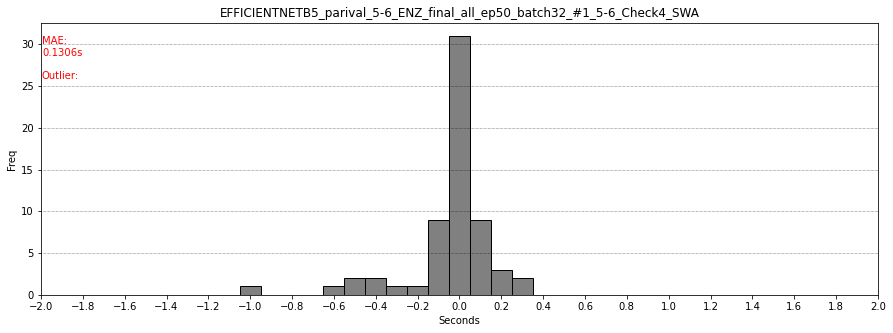

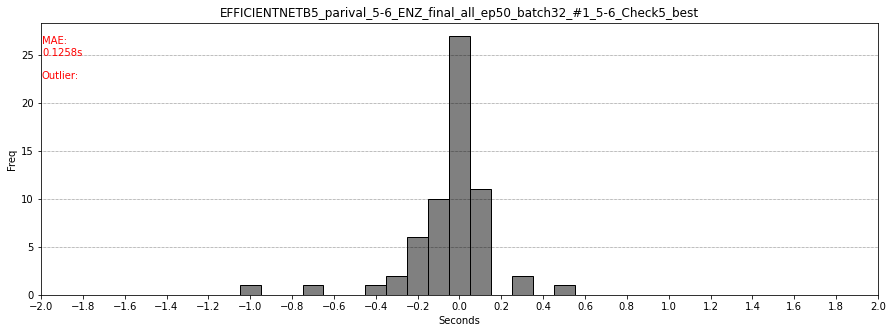

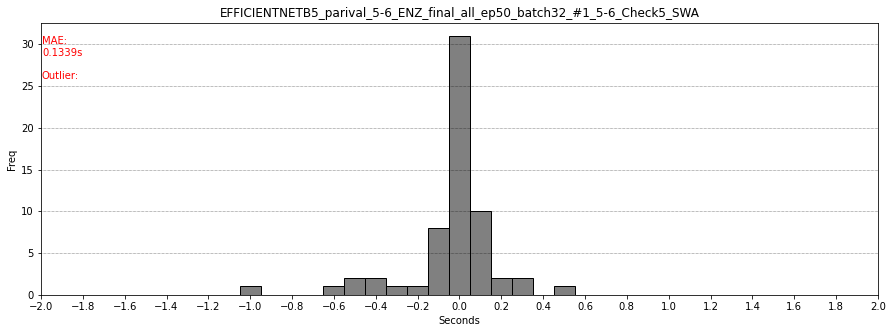

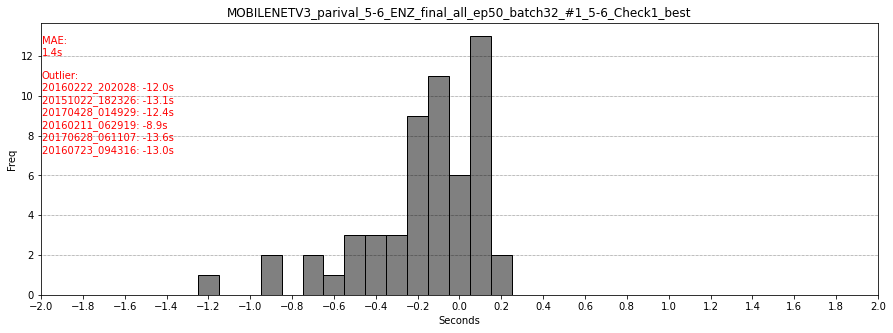

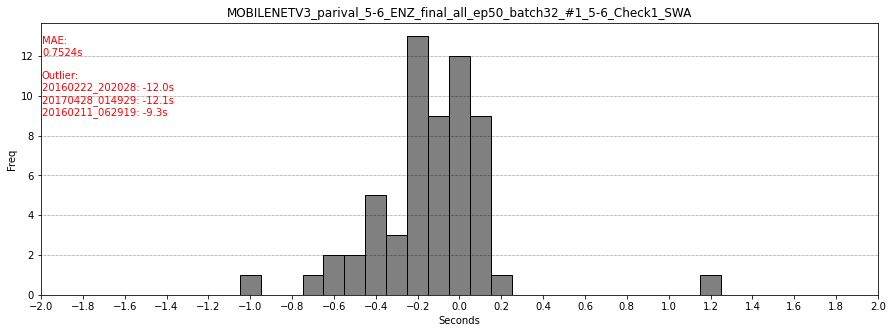

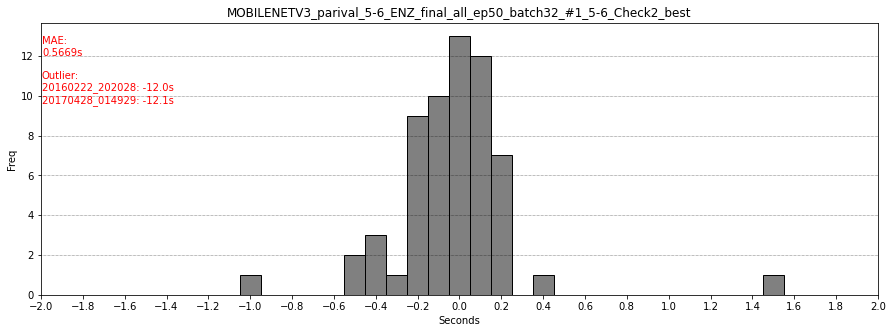

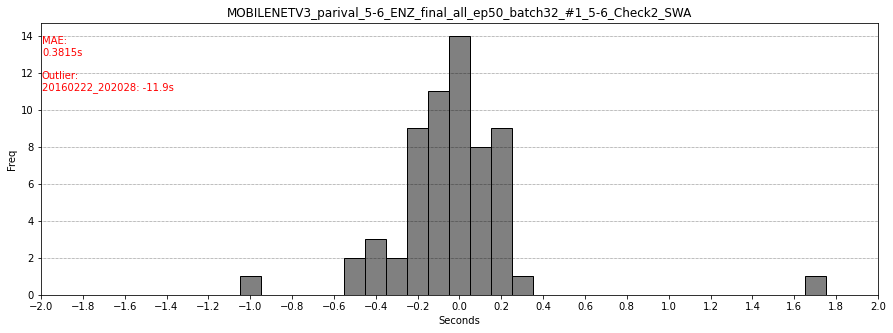

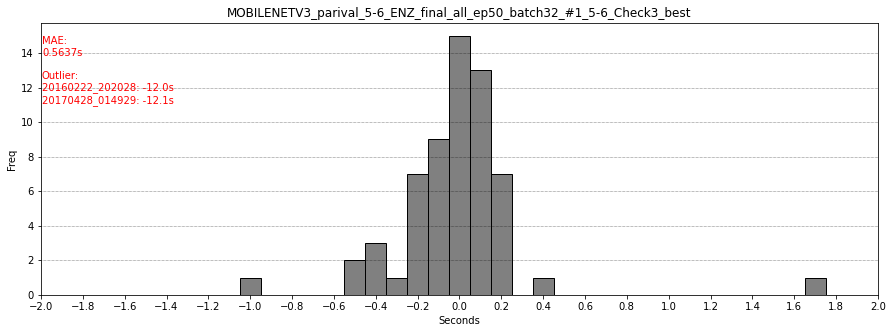

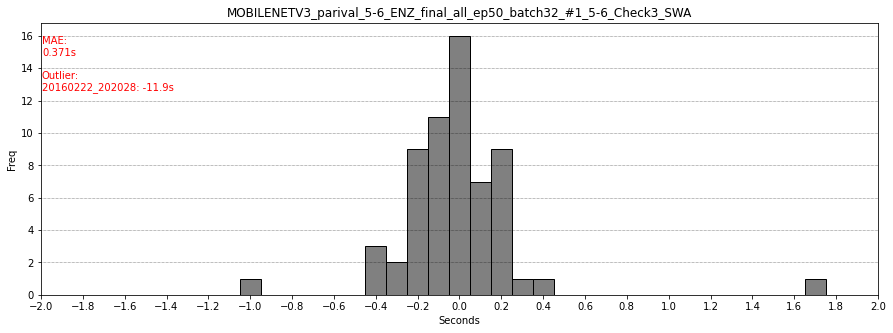

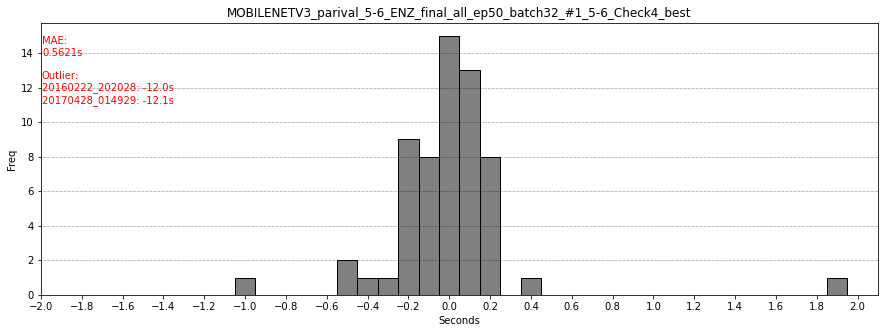

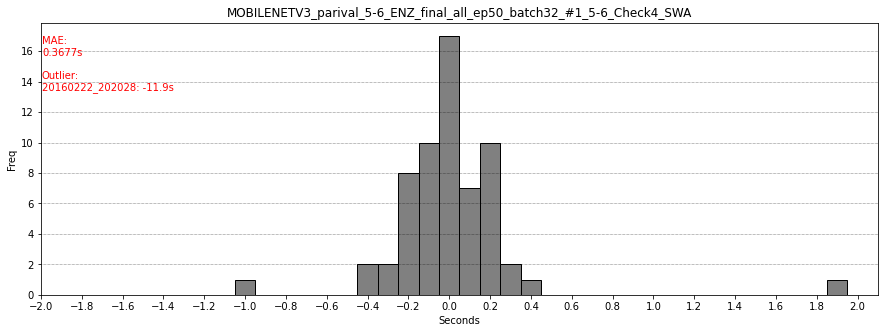

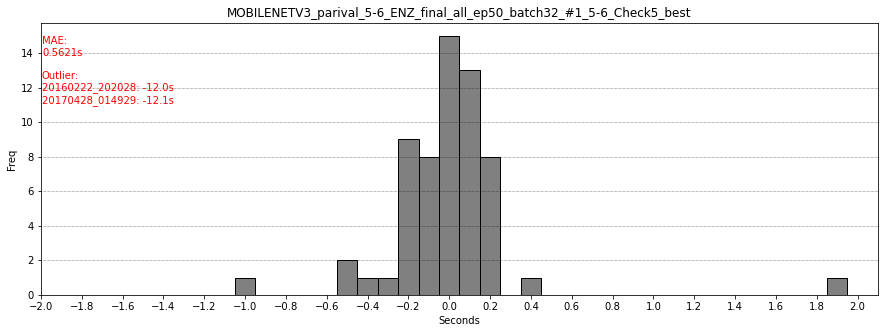

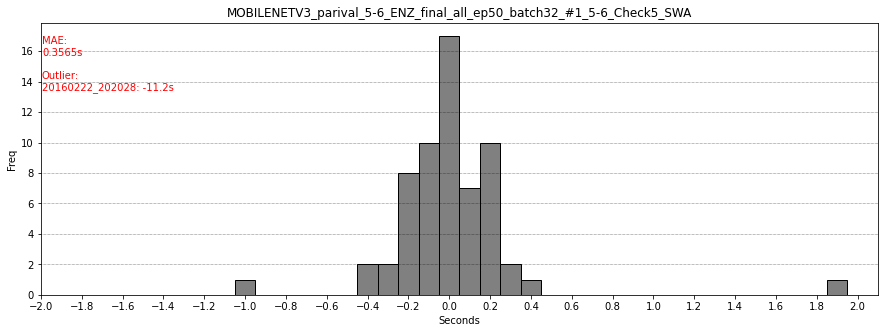

In [5]:
PA_start = {}
PA_end = {}
df_result = {}

# Get csv' result from each model
for _ in folders:
    csv_ = [__.replace('.csv','') for __ in os.listdir(_) if '.csv' in __]
    print(_)
    print(csv_)
    for __ in csv_:
        PA_start[__] = int(float(_.split('_')[2].split('-')[0])*20)
        PA_end[__] = int(float(_.split('_')[2].split('-')[-1])*20)
        df_result[__] = pd.read_csv(_+'/'+__+'.csv')
        parrival_plot(df_result[__],PA_start[__],(-2,2),_+'/'+__)
